Accuracy of Random Forest: 94.85627836611195
Specificity: 0.9825870646766169
Sensitivity: 0.8957528957528957
AUC-ROC Score: 98.16458249294071
0    2000
1    1303
Name: Diabetes, dtype: int64
[0]


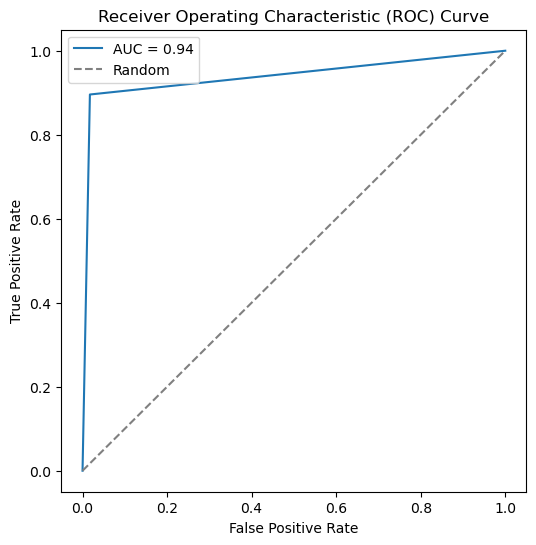

confusion_matrix


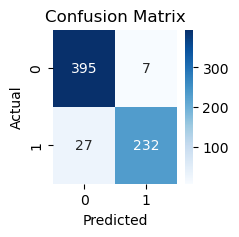

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import pickle

# Load the dataset from Excel
file_path = 'new_diab.csv'
df = pd.read_csv(file_path)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=l.fit_transform(df[i])

x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest: {accuracy*100}")

# Calculate specificity and sensitivity
conf_matrix_rf = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix_rf.ravel()
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")

# AUC-ROC Score
y_pred_probs_rf = rf_classifier.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_probs_rf)
print(f"AUC-ROC Score: {auc_roc*100}")

# Assuming you have a DataFrame df and the column of interest is 'Diabetes'
counts = df['Diabetes'].value_counts()
# Display the counts
print(counts)

# Save the trained Random Forest model using pickle
with open("Diabetes_model.pkl", "wb") as model_file:
    pickle.dump(rf_classifier, model_file)

# Make predictions on new data points
z = rf_classifier.predict([
    [26, 24.8, 4.67, 4.64, 121, 60, 0, 3, 3, 20]])
print(z)

from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Print the confusion matrix
print('confusion_matrix')
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
from sklearn.metrics import confusion_matrix
# Plot confusion matrix as a heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            # yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
